In [2]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (pd.read_csv)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader # Import tensor dataset & data loader

In [3]:
# data = pd.read_csv("D:/KULIAH/Sem 7/AI/Tugas Pytorch/Salary_Data.csv")
data = pd.read_csv("D:/KULIAH/Sem 7/AI/Tugas Pytorch/Salary_Data.csv")
# data = data.head(400)
data

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [4]:
# Memastikan tidak ada data yang berisi null
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

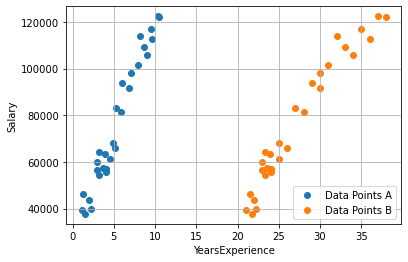

In [5]:
X1 = data['YearsExperience'].tolist()
X2 = data['Age'].tolist()
Y = data['Salary'].tolist()

plt.scatter(X1, Y, label='Data Points A')
plt.scatter(X2, Y, label='Data Points B')
plt.grid()
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [6]:
n = data.shape[0]
X = np.ones((n, 2)) 
X[:,0] = data['YearsExperience'].values
X[:,1] = data['Age'].values

X_train = np.array(X, dtype='float32').reshape(-1,2) #data['YearsExperience'].values
Y_train = np.array(data['Salary'].values, dtype='float32').reshape(-1,1)

# X_train = X_train.reshape(-1,2)
# Y_train = Y_train.reshape(-1,1)

inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(Y_train)

In [8]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 1.1000, 21.0000],
         [ 1.3000, 21.5000],
         [ 1.5000, 21.7000]]),
 tensor([[39343.],
         [46205.],
         [37731.]]))

In [9]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[10.5000, 38.0000],
         [ 1.1000, 21.0000],
         [ 4.1000, 24.0000],
         [ 2.9000, 23.0000],
         [ 4.5000, 25.0000]]),
 tensor([[121872.],
         [ 39343.],
         [ 57081.],
         [ 56642.],
         [ 61111.]])]

In [10]:
# class LR(nn.Module):
#     def __init__(self): #, in_features, out_features):
#         super().__init__()
#         self.linear = nn.Linear(2,1)
#     def forward(self, X):
#         pred = self.linear(X)
#         return pred

# model = LR()
# print(list(model.parameters()))

model = nn.Linear(2, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1234, -0.2457]], requires_grad=True)
Parameter containing:
tensor([0.2674], requires_grad=True)


In [11]:
opt = torch.optim.SGD(model.parameters(), lr= 1e-5) # Define optimizer
loss_fn = F.mse_loss                               # Define loss function
criterion = nn.MSELoss()

loss = criterion(model(inputs), targets)
print(loss)

tensor(6.5041e+09, grad_fn=<MseLossBackward0>)


In [12]:
# Define a utility function to train the model
loss_record =[]
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = criterion(pred, yb)
            loss_record.append(loss)
            #loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        print(f"Epochs : {epoch}, Loss : {loss}")
    print('Training loss: ', loss_fn(model(inputs), targets))

In [13]:
# Train the model for n epochs
fit(500, model, loss_fn, opt)

Epochs : 0, Loss : 7476184064.0
Epochs : 1, Loss : 3618811392.0
Epochs : 2, Loss : 4500853248.0
Epochs : 3, Loss : 2174276864.0
Epochs : 4, Loss : 2565921536.0
Epochs : 5, Loss : 1627054976.0
Epochs : 6, Loss : 1889445888.0
Epochs : 7, Loss : 830033856.0
Epochs : 8, Loss : 916408000.0
Epochs : 9, Loss : 1096530688.0
Epochs : 10, Loss : 1068697088.0
Epochs : 11, Loss : 1077340416.0
Epochs : 12, Loss : 765917504.0
Epochs : 13, Loss : 277531808.0
Epochs : 14, Loss : 629918272.0
Epochs : 15, Loss : 53665832.0
Epochs : 16, Loss : 219813072.0
Epochs : 17, Loss : 550392768.0
Epochs : 18, Loss : 263491664.0
Epochs : 19, Loss : 386344704.0
Epochs : 20, Loss : 151180320.0
Epochs : 21, Loss : 264738208.0
Epochs : 22, Loss : 173798880.0
Epochs : 23, Loss : 259844016.0
Epochs : 24, Loss : 76281512.0
Epochs : 25, Loss : 151909360.0
Epochs : 26, Loss : 153277856.0
Epochs : 27, Loss : 233211344.0
Epochs : 28, Loss : 290373920.0
Epochs : 29, Loss : 110004560.0
Epochs : 30, Loss : 93756344.0
Epochs : 31

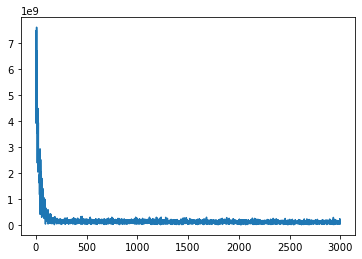

In [14]:
%matplotlib inline
loss_record = [ loss.detach().numpy() for loss in loss_record]
plt.plot(loss_record)

In [15]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 55129.1289],
        [ 56724.7773],
        [ 57558.1445],
        [ 59133.3594],
        [ 59966.7266],
        [ 63137.5938],
        [ 63300.1797],
        [ 64387.6367],
        [ 64387.6367],
        [ 65962.8516],
        [ 67050.3125],
        [ 67466.9922],
        [ 67466.9922],
        [ 67629.5781],
        [ 70820.8750],
        [ 71471.2188],
        [ 74337.3594],
        [ 77203.4844],
        [ 80719.9609],
        [ 83423.5078],
        [ 87265.1562],
        [ 87752.9062],
        [ 91594.5547],
        [ 94623.2734],
        [ 97977.1641],
        [101005.8828],
        [104359.7734],
        [107063.3203],
        [110742.3828],
        [113608.5078]], grad_fn=<AddmmBackward0>)

In [16]:
# Compare with targets
targets

tensor([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
        [112635.],
        [122391.],
        [121872.]])

In [17]:
# inputs = inputs.detach().numpy()
# pred = model(inputs).data
# predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()
# input = model(inputs).data.numpy()

# plt.clf()
# plt.scatter(X[:,0], preds.detach().numpy(), '--', label='Predictions', alpha=0.5)
# plt.scatter(X1, Y, label='Data Points A')
# plt.scatter(X2, Y, label='Data Points B')
# plt.grid()
# # plt.xlabel("YearsExperience")
# plt.ylabel("Salary")
# plt.legend()
# plt.show()

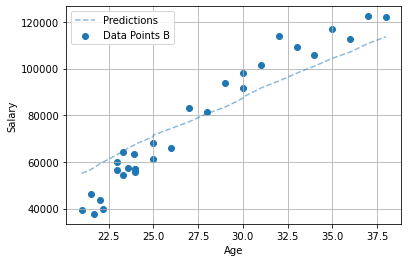

In [18]:
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()
pred = model(inputs).data.numpy()

plt.scatter(X2, Y, label='Data Points B')
plt.plot(X2, pred, '--', label='Predictions', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid()
plt.legend(loc='best')
plt.show()

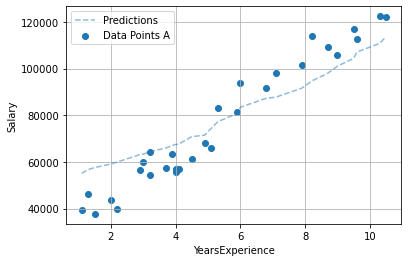

In [19]:
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()
pred = model(inputs).data.numpy()

plt.scatter(X1, Y, label='Data Points A')
plt.plot(X1, pred, '--', label='Predictions', alpha=0.5)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid()
plt.legend(loc='best')
plt.show()

In [168]:
from sklearn.metrics import r2_score
test_accuracy=r2_score(targets.detach().numpy(), preds.detach().numpy())
print(f'Accuracy: {test_accuracy}')

Accuracy: 0.8411781178208377
